<a href="https://colab.research.google.com/github/DestonSJU/IDS/blob/main/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 and 2. First I create and display the data from the csv file as a dataframe

In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import csv file
from google.colab import files
Upload = files.upload()

Saving nutrition_subset.csv to nutrition_subset.csv


In [3]:
#Set up dataframe and display it
nutritionDF = pd.read_csv("nutrition_subset.csv")
nutritionDF.head(65)

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
60,SALAMI; DRY TYPE 2 SLICES,20.00,2.4,16
61,CHICKEN; FRIED; BATTER; BREAST4.9 OZ,140.00,4.9,119
62,PORK; CURED; HAM; ROSTED;LEAN 2.4 OZ,68.00,1.3,37
63,CHEDDDAR CHEESE; SHREDDED 1 CUP,113.00,23.8,119


3.It is not valid to compare foods of different sizes because foods of larger sizes would naturally be more likely to have more saturated fat, while they are foods that might have less overall saturated fat, but more saturated fat per gram. This means that using saturated fat per gram is better because it takes into account the differences in size of the different foods

In [4]:
#Sorts df by saturated fat and displays highest 5 values
nutritionDF.sort_values(by=['saturated_fat'], ascending=False).iloc[0:5, :]

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


4. After sorting the data based on saturated fat per gram, I found that 1 tablespoon of salted butter has the most saturated fat per gram with about 0.507

In [5]:
#Loops through all rows and creates the coloumn saturated fat per gram
for x in range(len(nutritionDF)):
  nutritionDF["saturated_fat_per_gram"] = nutritionDF["saturated_fat"] / nutritionDF["weight_in_grams"]
#Sorts the df by saturated fat per gram and displays the highest 5 values
nutritionDF.sort_values(by=['saturated_fat_per_gram'], ascending=False).iloc[0:5, :]

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


5.After standardizing the data using z score and looking for outliers, I found there to be 15 high end outliers and 0 low end outliers. Based on the density plot, most of the values are near the mean, which is a little bit more than 0 (about 0.02) based on the plot

In [6]:
from scipy import stats
#Creates column for scaled saturated fat per gram and populates the values with eachrespective z score
for x in range(len(nutritionDF)):
  nutritionDF["scaled_saturated_fat_per_gram"] = stats.zscore(nutritionDF["saturated_fat_per_gram"], nan_policy='omit')

In [7]:
#Loops through df and increments count if the saturated fat per gram is greater than the mean + 3σ. Prints count afterwards
count = 0
for x, saturated_fat_per_gram in nutritionDF["saturated_fat_per_gram"].items():
  if nutritionDF.saturated_fat_per_gram[x] > np.average(nutritionDF.saturated_fat_per_gram) + 3*np.std(nutritionDF.saturated_fat_per_gram):
    print(x, nutritionDF["food item"][x], nutritionDF["saturated_fat_per_gram"][x], nutritionDF["scaled_saturated_fat_per_gram"][x])
    count = count + 1
print("Amount of high end outliers is", count)

210 CHOCOLATE; BITTER OT BAKING   1 OZ     0.31746031746031744 4.240676103292131
448 COCONUT; RAW; SHREDDED        1 CUP    0.2975 3.9386867655814006
492 COCONUT; DRIED; SWEETND;SHREDD1 CUP    0.3150537634408602 4.204266178653116
576 COCONUT; RAW; PIECE           1 PIECE  0.2977777777777778 3.942889400499841
709 BUTTER; SALTED                1/2 CUP  0.5053097345132743 7.0827411735471335
710 BUTTER; UNSALTED              1/2 CUP  0.5053097345132743 7.0827411735471335
890 LARD                          1 CUP    0.3921951219512195 5.371375259606528
898 FATS; COOKING/VEGETBL SHORTENG1 TBSP   0.25384615384615383 3.278226524168163
899 LARD                          1 TBSP   0.3923076923076923 5.373078391205745
907 FATS; COOKING/VEGETBL SHORTENG1 CUP    0.2502439024390244 3.223726312993202
908 BUTTER; SALTED                1 TBSP   0.5071428571428571 7.110475376169453
909 BUTTER; UNSALTED              1 TBSP   0.5071428571428571 7.110475376169453
912 BUTTER; SALTED                1 PAT    0.5 

In [8]:
#Loops through df and increments count if the saturated fat per gram is less than the mean - 3σ. Prints count afterwards
count = 0
for x, saturated_fat_per_gram in nutritionDF["saturated_fat_per_gram"].items():
  if nutritionDF.saturated_fat_per_gram[x] < np.average(nutritionDF.saturated_fat_per_gram) - 3*np.std(nutritionDF.saturated_fat_per_gram):
    print(x, nutritionDF["food item"][x], nutritionDF["saturated_fat_per_gram"][x], nutritionDF["scaled_saturated_fat_per_gram"][x])
    count = count + 1
print("Amount of low end outliers is", count)

Amount of low end outliers is 0


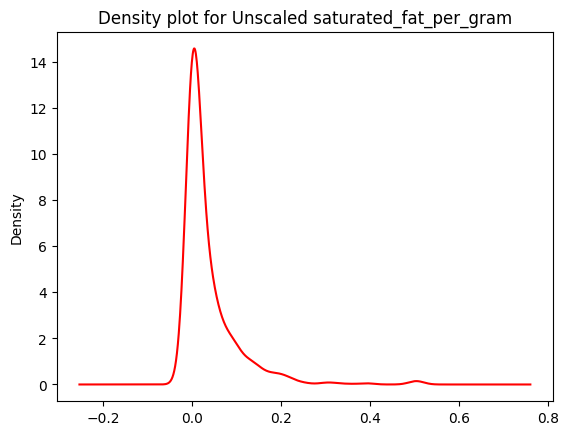

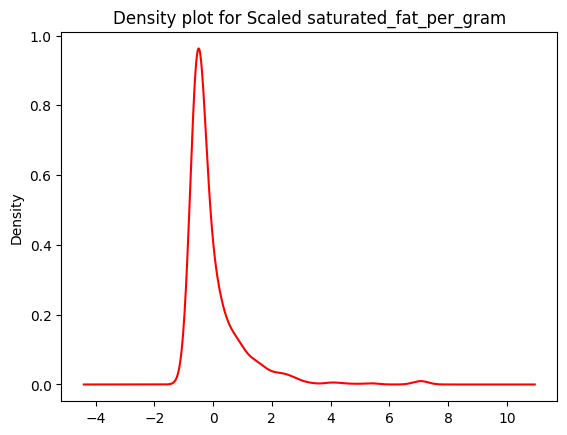

In [9]:
#Builds and displays density plot for unscaled saturated fat per gram
nutritionDF["saturated_fat_per_gram"].plot.density(color="red")
plt.title('Density plot for Unscaled saturated_fat_per_gram')
plt.show()

#Builds and displays density plot for unscaled saturated fat per gram
nutritionDF["scaled_saturated_fat_per_gram"].plot.density(color="red")
plt.title('Density plot for Scaled saturated_fat_per_gram')
plt.show()

6. There appears to be no missing values in this data

In [10]:
#Checks for missing values
nutritionDF.isnull().sum()

food item                        0
weight_in_grams                  0
saturated_fat                    0
cholesterol                      0
saturated_fat_per_gram           0
scaled_saturated_fat_per_gram    0
dtype: int64

7. I standardize the data for the rest of the numerical values and check for outliers. In addition to the 15 outliers I found before for the saturated fat per gram, I found weight in grams to have 22 outliers, saturated fat to have 20 outliers, and cholesterol to have 17 outliers.

In [11]:
#Creates column for scaled weight in grams and populates the values with each respective z score
for x in range(len(nutritionDF)):
  nutritionDF["scaled_weight_in_grams"] = stats.zscore(nutritionDF["weight_in_grams"], nan_policy='omit')

#Loops through df and increments count if the scaled weight in grams is greater than 3 or less than -3. Prints count afterwards
count = 0
for x, nutritionDF["scaled_weight_in_grams"] in nutritionDF["scaled_weight_in_grams"].items():
  if nutritionDF["scaled_weight_in_grams"][x] > 3:
    count = count + 1
  if nutritionDF["scaled_weight_in_grams"][x] < -3:
    count = count + 1
print("Amount of outliers is", count)

Amount of outliers is 22


In [12]:
#Creates column for scaled saturated fat and populates the values with each respective z score
for x in range(len(nutritionDF)):
  nutritionDF["scaled_saturated_fat"] = stats.zscore(nutritionDF["saturated_fat"], nan_policy='omit')

#Loops through df and increments count if the scaled staurated fat is greater than 3 or less than -3. Prints count afterwards
count = 0
for x, nutritionDF["scaled_saturated_fat"] in nutritionDF["scaled_saturated_fat"].items():
  if nutritionDF["scaled_saturated_fat"][x] > 3:
    count = count + 1
  if nutritionDF["scaled_saturated_fat"][x] < -3:
    count = count + 1
print("Amount of outliers is", count)

Amount of outliers is 20


In [13]:
#Creates column for scaled cholesterol and populates the values with eachrespective z score
for x in range(len(nutritionDF)):
  nutritionDF["scaled_cholesterol"] = stats.zscore(nutritionDF["cholesterol"], nan_policy='omit')

#Loops through df and increments count if the scaled cholesterol is greater than 3 or less than -3. Prints count afterwards
count = 0
for x, nutritionDF["scaled_cholesterol"] in nutritionDF["scaled_cholesterol"].items():
  if nutritionDF["scaled_cholesterol"][x] > 3:
    count = count + 1
  if nutritionDF["scaled_cholesterol"][x] < -3:
    count = count + 1
print("Amount of outliers is", count)

Amount of outliers is 17


In [14]:
#Displays df
nutritionDF.head(100)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram,scaled_weight_in_grams,scaled_saturated_fat,scaled_cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,-0.562335,-0.818514,-0.371329,-0.27151
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,-0.135401,-0.818514,-0.371329,-0.27151
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,-0.562335,-0.818514,-0.371329,-0.27151
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,2.319472,-0.818514,-0.371329,-0.27151
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,2.327397,-0.818514,-0.371329,-0.27151
...,...,...,...,...,...,...,...,...,...
95,PORK; CURED; HAM; ROSTED;LN+FT3 OZ,85.00,5.1,53,0.060000,0.345434,-0.818514,-0.371329,-0.27151
96,SPECIAL K CEREAL 1 OZ,28.35,0.0,0,0.000000,-0.562335,-0.818514,-0.371329,-0.27151
97,PISTACHIO NUTS 1 OZ,28.35,1.7,0,0.059965,0.344900,-0.818514,-0.371329,-0.27151
98,SUNFLOWER SEEDS 1 OZ,28.35,1.5,0,0.052910,0.238167,-0.818514,-0.371329,-0.27151


8. Summary: After importing the data and creating a dataframe with it, I sorted the data by the saturated fat and found the 5 highest values. The hightest out of those was 1 cheesecake with a saturated fat value of 119.9. However this isn't a valid way to find which food has the most saturated fat because it doesn't take into account the size of the food. To do that, We can use saturated fat per gram, which gives a more accurate picture on what foods have the most saturated fat. After finding the saturated fat per gram for each food and sorting the data and diplaying the 5 highest values based on saturated fat per gram, I found the food with the highest value to be 1 tablespoon of salted butter with a saturated fat per gram of 0.507. After this I standardized the saturated fat per gram and checked for outliers. I found 15 high end outliers and 0 low end outliers. After this I created a denstity plot for the unscaled and scaled saturated fat per gram and found that most of the values were close to the mean and that the mean is slightly over 0 (about 0.02). At this point I also checked for missing values and didn't find any. Finally I standardized the other 3 numeric variables and checked if they had any outliers. Weight per gram had 22, saturated fat had 20, and cholesterol had 17.